In [2]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,0.152157,0.269286,-0.664440,-0.007858,0.251801,-0.076332,0.020768,-0.114668,-0.018062,0.021840,0.000738,-0.096551,-0.002965,0.011188,0.011853,0.021593,-0.010971,-0.015706,-0.023636,0.009533
1,0.018163,0.311142,-0.662264,-0.090830,0.102641,-0.079617,0.108981,-0.139296,0.004460,0.077340,0.011503,-0.028966,-0.033957,0.008614,-0.021215,0.006169,-0.002159,-0.007599,-0.036948,0.002559
2,0.051636,0.164630,-0.639671,-0.058488,0.207924,-0.098091,0.030144,-0.073239,-0.037066,-0.012228,-0.013298,-0.089287,-0.013133,0.020588,0.003772,0.044083,-0.002461,-0.018772,-0.007953,0.038371
3,0.102774,0.320703,-0.633473,-0.057245,0.148099,-0.085189,0.039058,-0.082828,-0.110632,0.002714,0.016571,-0.091406,-0.055110,-0.057388,-0.020759,0.027895,0.022026,-0.012073,-0.000920,0.009552
4,0.073158,0.242542,-0.648909,-0.012301,0.132242,-0.112953,0.088382,-0.120896,-0.026368,0.012842,0.036086,-0.061301,-0.061334,-0.029896,-0.017304,0.014958,0.038443,-0.058949,-0.000498,0.031522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,0.354308,0.790609,-0.492305,-0.097036,-0.192074,0.091156,0.052319,0.018053,0.061481,-0.008595,-0.026535,-0.046467,0.004563,0.005990,-0.001999,-0.033813,0.007821,0.020409,-0.028418,0.003471
4116,0.294370,0.748039,-0.465122,-0.112522,-0.065915,0.007878,0.056151,0.045268,0.059128,-0.067068,-0.025705,-0.021046,-0.025543,0.015761,0.050491,-0.027307,-0.015374,0.003187,-0.031224,0.018033
4117,0.329690,0.796307,-0.467295,-0.034373,-0.126376,0.051487,0.016688,0.029610,0.073143,-0.032715,-0.021268,-0.043884,-0.029709,0.032104,0.022162,-0.028572,-0.015654,0.006811,-0.033324,0.007429
4118,0.360083,0.694383,-0.424058,-0.048074,-0.046272,0.118375,0.048668,0.037493,0.056093,-0.021235,-0.008730,-0.029310,0.001433,0.003571,-0.004730,-0.060940,-0.036756,0.009988,-0.018920,0.010349


In [4]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset = train_dataset.repeat(5).shuffle(100).batch(16)
test_dataset = test_dataset.batch(16)
validation_dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(20,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [5]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(100, activation="sigmoid"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(500, activation="sigmoid"),
  keras.layers.Dense(6),
  keras.layers.Softmax(),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.005), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

In [6]:
history = model.fit(
  train_dataset, epochs=20,
  validation_data=validation_dataset,
  callbacks=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto'
  )
)

Epoch 1/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3008 - loss: 1.7567 - val_accuracy: 0.4775 - val_loss: 1.4539
Epoch 2/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4651 - loss: 1.4272 - val_accuracy: 0.5006 - val_loss: 1.3402
Epoch 3/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5191 - loss: 1.2884 - val_accuracy: 0.5434 - val_loss: 1.1898
Epoch 4/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5682 - loss: 1.1579 - val_accuracy: 0.5873 - val_loss: 1.0621
Epoch 5/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6049 - loss: 1.0453 - val_accuracy: 0.6566 - val_loss: 0.9518
Epoch 6/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6410 - loss: 0.9386 - val_accuracy: 0.6624 - val_loss: 0.8982
Epoch 7/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6750 - loss: 0.8491 - val_accuracy: 0.6890 - val_loss: 0.8381
Epoch 8/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7073 - loss: 0.7746 - val_accuracy: 0.

In [7]:
model.evaluate(test_dataset)

22/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.5387 

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.5130


[0.4621030390262604, 0.8624595403671265]

In [8]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_20876\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


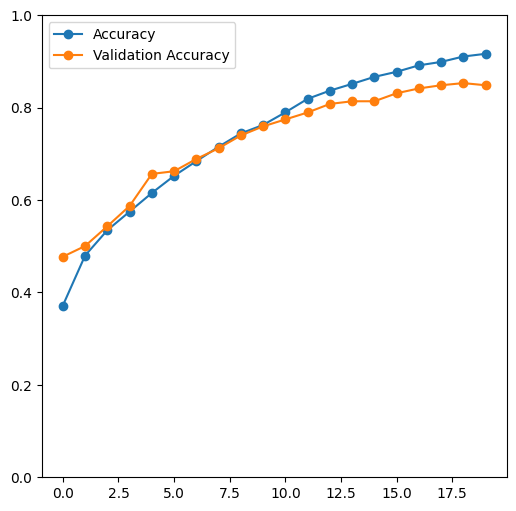

In [9]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()